Clustering Algorithms

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Step 1: Load the custom dataset from CSV file
data = pd.read_csv('breastcancer.csv')
df = pd.DataFrame(data)
# Fill missing values (if any)
df.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE:  5152.214658957077


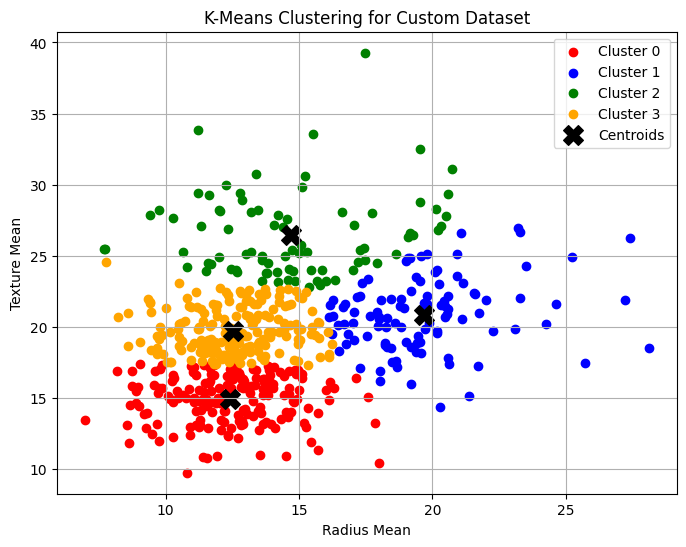

In [ ]:
# Step 2: Extract the features for clustering
X = df[['radius_mean', 'texture_mean']].values

# Step 3: Determine the number of clusters (K)
num_clusters = 4

# Step 4: Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Step 5: Visualize the clustered data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange']

for cluster_num in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster_num]
    plt.scatter(cluster_data['radius_mean'], cluster_data['texture_mean'], color=colors[cluster_num], label=f'Cluster {cluster_num}')

sse_score = kmeans.inertia_
print("SSE: ",sse_score)
cluster_centers = kmeans.cluster_centers_

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('K-Means Clustering for Custom Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Drop any rows with missing values
data.dropna(inplace=True)
X = data[['radius_mean', 'texture_mean']].values
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)
#Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

#Calculate Davies-Bouldin Index for the clustering results
davies_bouldin_score_value = davies_bouldin_score(X, kmeans.labels_)
print("Davies Bouldin Score:",davies_bouldin_score_value)

sse_score = kmeans.inertia_
ch_score = calinski_harabasz_score(X, data['cluster'])
print("Calinski-Harabasz score:", ch_score)
print("SSE: ",sse_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.35601649150931414
Davies Bouldin Score: 0.9244160089594434
Calinski-Harabasz score: 453.6009465851326
SSE:  5152.214658957077


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

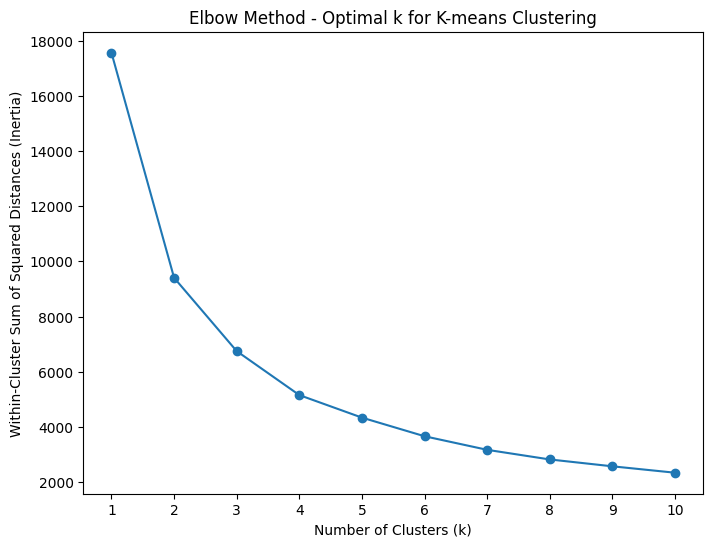

SSE:  2338.580206428521


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('breastcancer.csv')
data = df[['radius_mean', 'texture_mean']]
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squared Distances (Inertia)')
plt.title('Elbow Method - Optimal k for K-means Clustering')
plt.xticks(np.arange(1, 11, 1))
plt.show()
sse_score = kmeans.inertia_
print("SSE: ",sse_score)

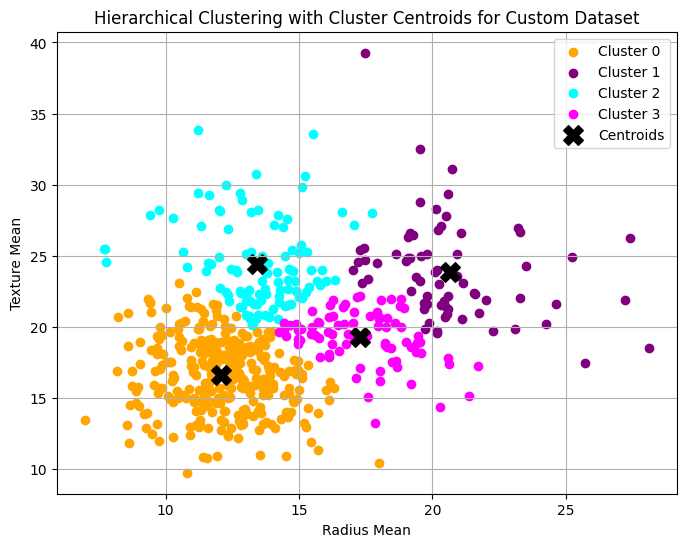

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the custom dataset from CSV file
data = pd.read_csv('/content/breastcancer.csv')
df = pd.DataFrame(data)

# Fill missing values (if any)
df.fillna(0, inplace=True)

# Step 2: Extract the features for clustering
X = df[['radius_mean', 'texture_mean']].values

# Step 3: Determine the number of clusters (K)
num_clusters = 4

# Step 4: Apply Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters)
df['cluster'] = hierarchical_clustering.fit_predict(X)

# Step 5: Calculate and plot the cluster centroids
cluster_centroids = []

for cluster_num in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_num]
    centroid = cluster_data.mean()  # Calculate the centroid by taking the mean of the cluster's data points
    cluster_centroids.append(centroid)

cluster_centroids = pd.DataFrame(cluster_centroids)

# Step 6: Visualize the clustered data and the centroids
plt.figure(figsize=(8, 6))
colors = ['orange', 'purple', 'cyan', 'magenta']

for cluster_num in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['radius_mean'], cluster_data['texture_mean'], color=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.scatter(cluster_centroids['radius_mean'], cluster_centroids['texture_mean'], marker='X', s=200, c='black', label='Centroids')

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Hierarchical Clustering with Cluster Centroids for Custom Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 1: Load the custom dataset from CSV file
data = pd.read_csv('/content/breastcancer.csv')
df = pd.DataFrame(data)
# Fill missing values (if any)
df.fillna(0, inplace=True)

# Step 2: Extract the features for clustering
X = df[['radius_mean', 'texture_mean']].values
# Step 3: Determine the number of clusters (K)
num_clusters = 4

# Step 4: Apply Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters)
df['cluster'] = hierarchical_clustering.fit_predict(X)

# Step 5: Calculate evaluation metrics
silhouette_avg = silhouette_score(X, df['cluster'])
davies_bouldin = davies_bouldin_score(X, df['cluster'])
calinski_harabasz = calinski_harabasz_score(X, df['cluster'])

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.348296909957056
Davies-Bouldin Index: 0.9416505113686666
Calinski-Harabasz Index: 360.22306780492215


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the custom dataset from CSV file
data = pd.read_csv('/content/breastcancer.csv')
df = pd.DataFrame(data)

# Fill missing values (if any)
df.fillna(0, inplace=True)

# Step 2: Extract the features for clustering
X = df[['radius_mean', 'texture_mean']].values

# Step 3: Determine the number of clusters (K)
num_clusters = 4

# Step 4: Apply Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters)
df['cluster'] = hierarchical_clustering.fit_predict(X)

# Step 5: Calculate SSE score (approximation using linkage distances)
def calculate_sse(X, labels):
    sse = 0
    for cluster_num in range(np.max(labels) + 1):
        cluster_data = X[labels == cluster_num]
        centroid = np.mean(cluster_data, axis=0)
        sse += np.sum((cluster_data - centroid) ** 2)
    return sse

sse_score = calculate_sse(X, hierarchical_clustering.labels_)
print(f"SSE Score for Hierarchical Clustering: {sse_score}")

SSE Score for Hierarchical Clustering: 6029.2491350390565


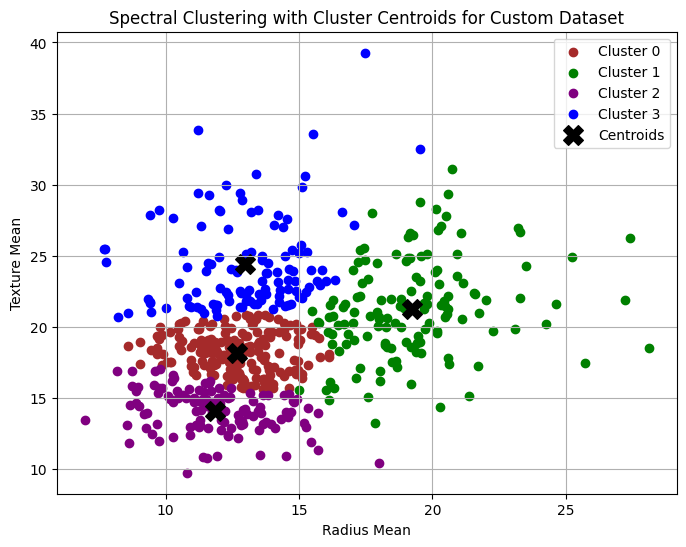

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Step 1: Load the custom dataset from CSV file
data = pd.read_csv('/content/breastcancer.csv')
df = pd.DataFrame(data)

# Fill missing values (if any)
df.fillna(0, inplace=True)

# Step 2: Extract the features for clustering
X = df[['radius_mean', 'texture_mean']].values

# Step 3: Determine the number of clusters (K)
num_clusters = 4

# Step 4: Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=42)
df['cluster'] = spectral_clustering.fit_predict(X)

# Step 5: Calculate and plot the cluster centroids
cluster_centroids = []

for cluster_num in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_num]
    centroid = cluster_data.mean()  # Calculate the centroid by taking the mean of the cluster's data points
    cluster_centroids.append(centroid)

cluster_centroids = pd.DataFrame(cluster_centroids)

# Step 6: Visualize the clustered data and the centroids
plt.figure(figsize=(8, 6))
colors = ['brown', 'green', 'purple', 'blue']

for cluster_num in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['radius_mean'], cluster_data['texture_mean'], color=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.scatter(cluster_centroids['radius_mean'], cluster_centroids['texture_mean'], marker='X', s=200, c='black', label='Centroids')

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Spectral Clustering with Cluster Centroids for Custom Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 1: Load the custom dataset from CSV file
data = pd.read_csv('/content/breastcancer.csv')
df = pd.DataFrame(data)

# Step 6: Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=42)
df['cluster_spectral'] = spectral_clustering.fit_predict(X)

# Step 7: Calculate evaluation metrics for Spectral Clustering
silhouette_avg_spectral = silhouette_score(X, df['cluster_spectral'])
davies_bouldin_spectral = davies_bouldin_score(X, df['cluster_spectral'])
calinski_harabasz_spectral = calinski_harabasz_score(X, df['cluster_spectral'])

print("Evaluation metrics for Spectral Clustering:")
print(f"Silhouette Score: {silhouette_avg_spectral}")
print(f"Davies-Bouldin Index: {davies_bouldin_spectral}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_spectral}")


Evaluation metrics for Spectral Clustering:
Silhouette Score: 0.319966904576273
Davies-Bouldin Index: 0.9874700717870604
Calinski-Harabasz Index: 386.47694320493946


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
# Step 1: Load the custom dataset from CSV file
data = pd.read_csv('/content/breastcancer.csv')
df = pd.DataFrame(data)

# Step 6: Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=42)
df['cluster_spectral'] = spectral_clustering.fit_predict(X)

# Step 7: Calculate SSE score (approximation using cluster centroids)
def calculate_sse_spectral(X, labels):
    sse = 0
    for cluster_num in range(np.max(labels) + 1):
        cluster_data = X[labels == cluster_num]
        centroid = np.mean(cluster_data, axis=0)
        sse += np.sum((cluster_data - centroid) ** 2)
    return sse

sse_score_spectral = calculate_sse_spectral(X, spectral_clustering.labels_)
print(f"SSE Score for Spectral Clustering: {sse_score_spectral}")

SSE Score for Spectral Clustering: 5753.869306236651


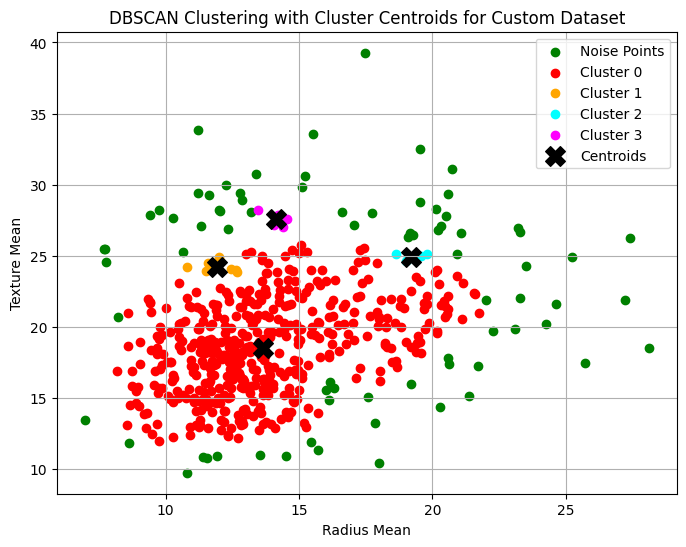

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Step 1: Load the custom dataset from CSV file
data = pd.read_csv('/content/breastcancer.csv')
df = pd.DataFrame(data)

# Fill missing values (if any)
df.fillna(0, inplace=True)

# Step 2: Extract the features for clustering
X = df[['radius_mean', 'texture_mean']].values

# Step 3: Determine the number of clusters (K)
num_clusters = 4

# Step 4: Apply DBSCAN Clustering
dbscan_clustering = DBSCAN(eps=1, min_samples=5)
df['cluster_dbscan'] = dbscan_clustering.fit_predict(X)

# Step 5: Calculate and plot the cluster centroids
cluster_centroids_dbscan = []

for cluster_num in np.unique(df['cluster_dbscan']):
    if cluster_num == -1:
        continue  # Skip noise points (cluster_num -1)

    cluster_data = df[df['cluster_dbscan'] == cluster_num]
    centroid = cluster_data.mean()  # Calculate the centroid by taking the mean of the cluster's data points
    cluster_centroids_dbscan.append(centroid)

cluster_centroids_dbscan = pd.DataFrame(cluster_centroids_dbscan)

# Step 6: Visualize the clustered data and the centroids
plt.figure(figsize=(8, 6))
colors = ['red', 'orange',  'cyan', 'magenta']

for cluster_num in np.unique(df['cluster_dbscan']):
    if cluster_num == -1:
        plt.scatter(df['radius_mean'][df['cluster_dbscan'] == -1], df['texture_mean'][df['cluster_dbscan'] == -1], color='green', label='Noise Points')
    else:
        cluster_data = df[df['cluster_dbscan'] == cluster_num]
        plt.scatter(cluster_data['radius_mean'], cluster_data['texture_mean'], color=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.scatter(cluster_centroids_dbscan['radius_mean'], cluster_centroids_dbscan['texture_mean'], marker='X', s=200, c='black', label='Centroids')

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('DBSCAN Clustering with Cluster Centroids for Custom Dataset')
plt.legend()
plt.grid(True)
plt.show()

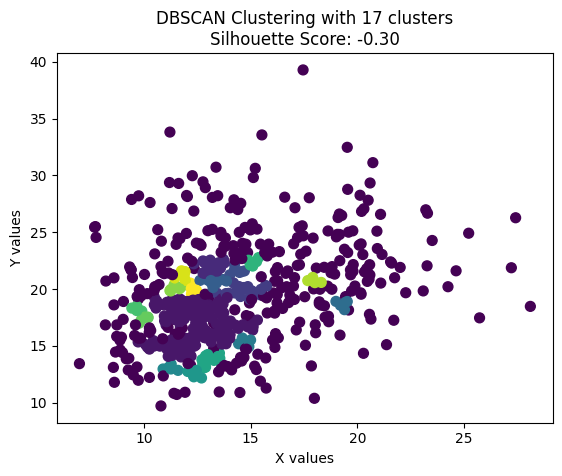

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/breastcancer.csv')

X = data['radius_mean'].values
Y = data['texture_mean'].values

# Combine 'X' and 'Y' into a single feature matrix
# In this example, we stack 'X' and 'Y' horizontally to form a 2D array

feature_matrix = np.column_stack((X, Y))

# Determine the epsilon (eps) and minimum samples (min_samples) for DBSCAN
eps = 0.5
min_samples = 5
# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(feature_matrix)
# Get the number of clusters (excluding noise points, labeled as -1 by DBSCAN)
n_clusters = len(np.unique(labels)) - 1

# Calculate silhouette score
silhouette_avg = silhouette_score(feature_matrix, labels)

# Visualize the clustered data
plt.scatter(X, Y, c=labels, s=50, cmap='viridis')
plt.title(f"DBSCAN Clustering with {n_clusters} clusters\nSilhouette Score: {silhouette_avg:.2f}")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

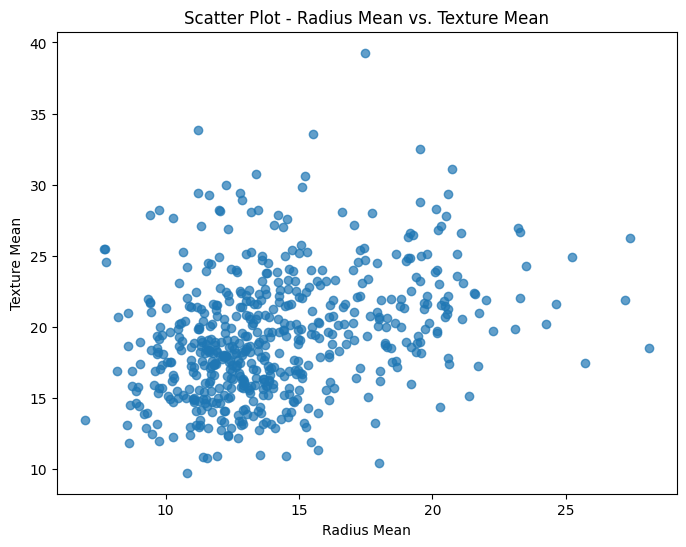

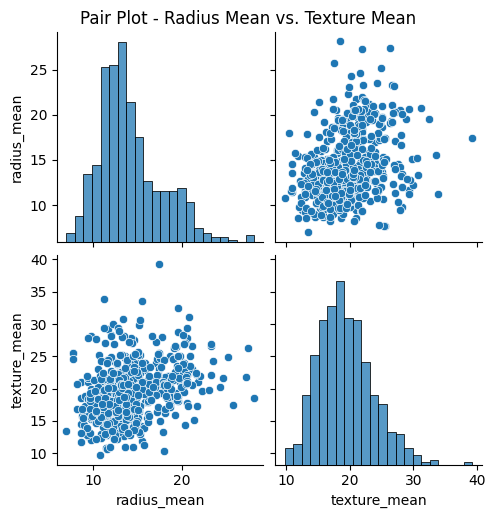

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('breastcancer.csv')
plt.figure(figsize=(8, 6))
plt.scatter(df['radius_mean'], df['texture_mean'], alpha=0.7)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatter Plot - Radius Mean vs. Texture Mean')
plt.show()
sns.pairplot(df[['radius_mean', 'texture_mean']])
plt.suptitle('Pair Plot - Radius Mean vs. Texture Mean', y=1.02)
plt.show()

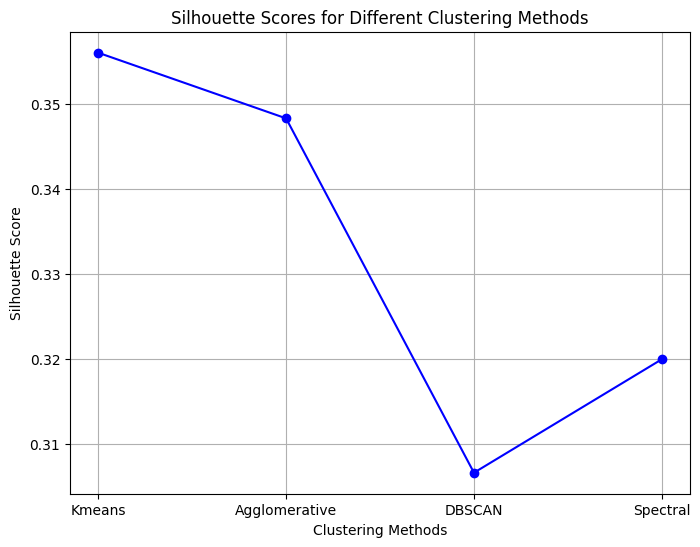

In [ ]:
import matplotlib.pyplot as plt

# Data
clustering_methods = ['Kmeans', 'Agglomerative', 'DBSCAN', 'Spectral']
silhouette_scores = [0.35601649150931414, 0.348296909957056, 0.306622060083685, 0.319966904576273]

# Create the line graph
plt.figure(figsize=(8, 6))
plt.plot(clustering_methods, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Clustering Methods')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Clustering Methods')
plt.grid(True)
plt.show()

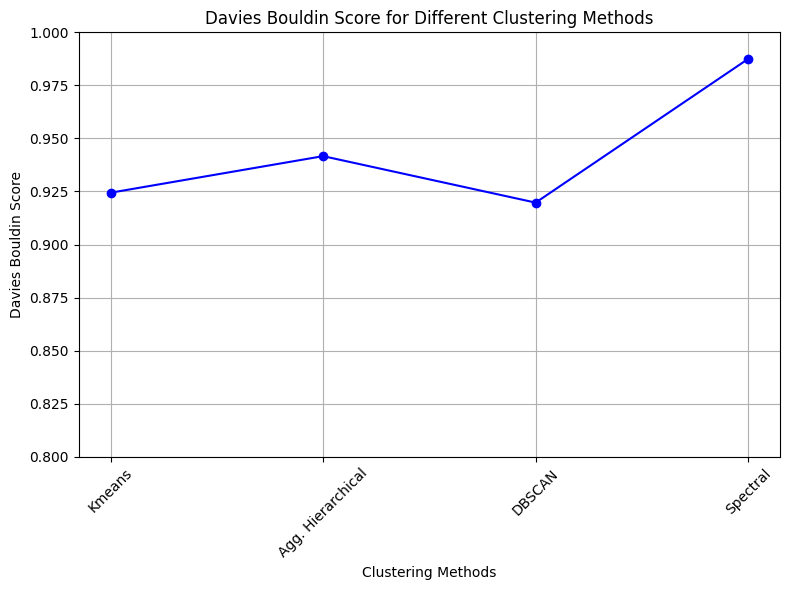

In [ ]:
import matplotlib.pyplot as plt

# Data
clustering_methods = ['Kmeans', 'Agg. Hierarchical', 'DBSCAN','Spectral']
davies_bouldin_scores = [0.9244160089594434, 0.9416505113686666, 0.9197385197872403, 0.9874700717870604]

# Create the line graph
plt.figure(figsize=(8, 6))
plt.plot(clustering_methods, davies_bouldin_scores, marker='o', color='b')
plt.xlabel('Clustering Methods')
plt.ylabel('Davies Bouldin Score')
plt.title('Davies Bouldin Score for Different Clustering Methods')
plt.grid(True)
plt.ylim(0.8, 1.0)  # Set the y-axis limits for better visualization
plt.xticks(rotation=45)
plt.tight_layout()

# Display the line graph
plt.show()

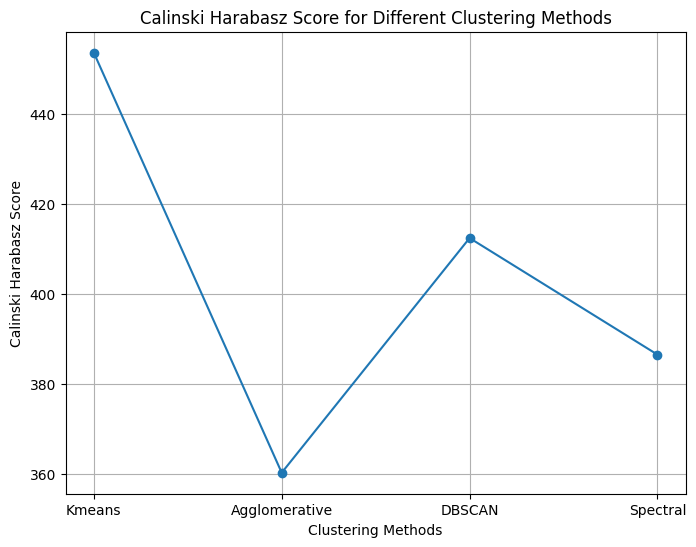

In [ ]:
import matplotlib.pyplot as plt

# Data
methods = ['Kmeans', 'Agglomerative', 'DBSCAN', 'Spectral']
scores = [453.6009465851326, 360.22306780492215, 412.397385197872403, 386.47694320493946]

# Create the line graph
plt.figure(figsize=(8, 6))
plt.plot(methods, scores, marker='o', linestyle='-')
plt.xlabel('Clustering Methods')
plt.ylabel('Calinski Harabasz Score')
plt.title('Calinski Harabasz Score for Different Clustering Methods')
plt.grid(True)

# Display the graph
plt.show()


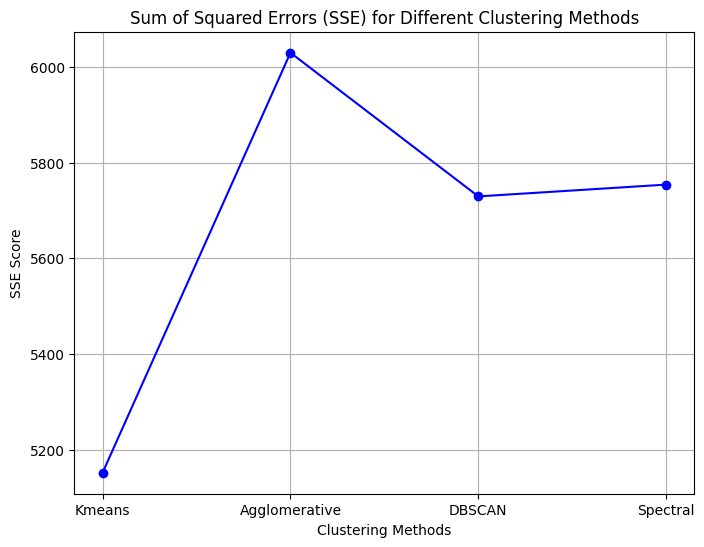

In [ ]:
import matplotlib.pyplot as plt

# Data for the line graph
clustering_methods = ['Kmeans', 'Agglomerative', 'DBSCAN', 'Spectral']
sse_scores = [5152.214658957077, 6029.2491350390565, 5729.2131107493053,  5753.869306236651 ]

# Create the line graph
plt.figure(figsize=(8, 6))
plt.plot(clustering_methods, sse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Clustering Methods')
plt.ylabel('SSE Score')
plt.title('Sum of Squared Errors (SSE) for Different Clustering Methods')
plt.grid(True)

# Display the graph
plt.show()
